<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bpractice%5D_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Basic setting
import os
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# Decision Tree 분류 모델

## [P.1] 결정 트리 학습

iris 붓꽃 데이터를 결정 트리로 학습해볼 것임     
사이킷런에서 제공하는 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)를 이용해 모델 선언

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, 2:] # petal length and width
y = iris.target

In [ ]:
def plot_dataset(X, y, show=True):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 's')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], '^')
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'o')
    
    if show:
        plt.show()

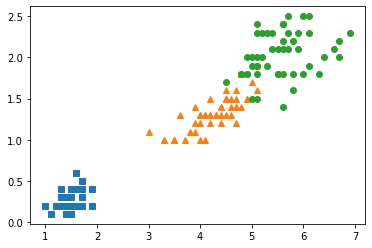

In [ ]:
plot_dataset(X, y)

결정 트리의 학습, 즉 노드를 늘려가는 작업을 멈춰주는 argument는 다음과 같음

* __max_depth__: depth의 최대 크기
* __min_samples_split__: 한 노드에 존재해야되는 최소의 샘플 수로, 이 수보다 적게 존재하면 결정 트리의 split을 멈춤
* __min_samples_leaf__: leaf 노드가 되기 위해서 필요한 최소의 샘플 수
* __max_leaf_nodes__: leaf 노드의 최대수 설정

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
def plot_decision_boundary(clf, axes=None):
    if axes is None:
        x0 = np.linspace(0, 8, 100)
        x1 = np.linspace(0, 3, 100)
    else:
        x0 = np.linspace(axes[0][0], axes[0][1], 100)
        x1 = np.linspace(axes[1][0], axes[1][1], 100)
        
    
    x0, x1 = np.meshgrid(x0, x1)
    X_new = np.c_(x0.ravel(), x1.ravel())
    
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, alpha=0.25)
    plt.show()

TypeError: ignored

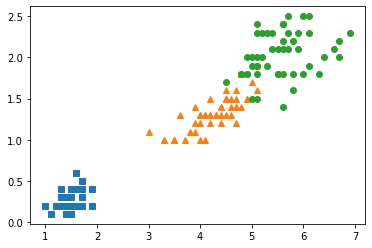

In [ ]:
plt.figure(figsize=(6, 4))

plot_dataset(X, y, False)
plot_decision_boundary(tree_clf)

plt.show()

depth는 결정 트리의 split 수를 결정해주는 요소임    
따라서 `max_depth=3`으로 설정했을 때, 위의 그림처럼 세개의 선이 융합되어 결정 경계가 생성됨

## [P.2] 결정 트리 정확도 계산

데이터에 대한 성능은 [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)를 통해 계산이 가능함     
`y_pred`의 argument는 결정 트리 클래스의 `predict` 함수를 통해 예측 확률이 가장 높은 클래스를 얻으면 됨     

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

각 샘플에 대한 클래스 확률을 보려면, `DecisionTreeClassifier` 클래스의 `predict_proba` 메서드 사용하면 됨

In [ ]:
index = 0
tree_clf.predict_proba(X_test[index].reshape(-1, 2))

In [ ]:
plt.figure(figsize=(6, 4))

plot_dataset(X_test, y_test, False)
plot_decision_boundary(tree_clf)

plt.show()

## [P.3] 결정 트리의 하이퍼파라미터 조절

`max_depth` argument를 조절해가며, 결정 트리가 데이터셋을 어떻게 학습하는지 분석

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.5, random_state=53)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=100, random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
???

In [ ]:
plt.figure(figsize=(6, 4))

plot_dataset(X_train, y_train, False)
plot_decision_boundary(tree_clf, axes=[[-2.5,4], [-2, 2.5]])

plt.show()

split의 수가 너무 많으면, 학습 데이터셋에 오버피팅 되는 경향이 생기고 결국 평가 데이터셋에 대한 성능은 하락함     
하지만, iris나 moons는 간단한 데이터이기 때문에 오히려 학습 데이터셋에 오버피팅 됐을 때 더 좋은 성능을 보여주기도 함